In [2]:
# !pip install mlxtend



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s eta 0:00:00


In [3]:
transactions = [['Bread', 'Milk'],
                ['Bread', 'Cheese', 'Juice', 'Eggs'],
                ['Milk', 'Cheese', 'Juice', 'Coke' ],
                ['Bread', 'Milk', 'Cheese', 'Juice'],
                ['Bread', 'Milk', 'Cheese', 'Coke']]



In [5]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder() 

rows = te.fit_transform(transactions)
print(rows)


[[ True False False False False  True]
 [ True  True False  True  True False]
 [False  True  True False  True  True]
 [ True  True False False  True  True]
 [ True  True  True False False  True]]


In [6]:
import pandas as pd 
df = pd.DataFrame(rows,columns=te.columns_) 
df

,Bread,Cheese,Coke,Eggs,Juice,Milk
0,True,False,False,False,False,True
1,True,True,False,True,True,False
2,False,True,True,False,True,True
3,True,True,False,False,True,True
4,True,True,True,False,False,True


In [7]:
from mlxtend.frequent_patterns import apriori 

featues_itemsets = apriori(df,min_support=.4,use_colnames=True)
print(featues_itemsets)
featues_itemsets['length'] = featues_itemsets['itemsets'].apply(lambda x: len(x))

    support                itemsets
0       0.8                 (Bread)
1       0.8                (Cheese)
2       0.4                  (Coke)
3       0.6                 (Juice)
4       0.8                  (Milk)
5       0.6         (Bread, Cheese)
6       0.4          (Juice, Bread)
7       0.6           (Milk, Bread)
8       0.4          (Cheese, Coke)
9       0.6         (Juice, Cheese)
10      0.6          (Milk, Cheese)
11      0.4            (Milk, Coke)
12      0.4           (Milk, Juice)
13      0.4  (Juice, Bread, Cheese)
14      0.4   (Milk, Bread, Cheese)
15      0.4    (Milk, Cheese, Coke)
16      0.4   (Milk, Juice, Cheese)


In [8]:
featues_itemsets

,support,itemsets,length
0,0.8,(Bread),1
1,0.8,(Cheese),1
2,0.4,(Coke),1
3,0.6,(Juice),1
4,0.8,(Milk),1
5,0.6,"(Bread, Cheese)",2
6,0.4,"(Juice, Bread)",2
7,0.6,"(Milk, Bread)",2
8,0.4,"(Cheese, Coke)",2
9,0.6,"(Juice, Cheese)",2


In [10]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(featues_itemsets,metric='confidence',min_threshold=0.6)


In [14]:
rules = rules.sort_values('confidence',ascending=False)

In [15]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
20,"(Milk, Coke)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
10,(Coke),(Milk),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
21,"(Cheese, Coke)",(Milk),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
22,(Coke),"(Milk, Cheese)",0.4,0.6,0.4,1.000000,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000000,0.833333
23,"(Milk, Juice)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
5,(Coke),(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
6,(Juice),(Cheese),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.500000,0.750000,1.000000,0.875000
12,"(Juice, Bread)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
1,(Cheese),(Bread),0.8,0.8,0.6,0.750000,0.937500,1.0,-0.04,0.8,-0.250000,0.600000,-0.250000,0.750000
0,(Bread),(Cheese),0.8,0.8,0.6,0.750000,0.937500,1.0,-0.04,0.8,-0.250000,0.600000,-0.250000,0.750000


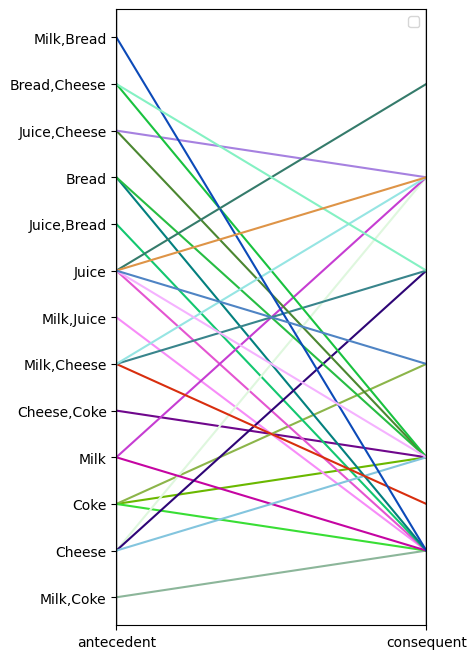

In [19]:
from matplotlib import pyplot as plt 
from pandas.plotting import parallel_coordinates 

rules['antecedent'] =  rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequent'] = rules['consequents'].apply(lambda x: ','.join(list(x)))

rules['rule_n'] = rules.index

coord_rules = rules[['antecedent','consequent','rule_n']]

plt.figure(figsize=(4,8))

parallel_coordinates(coord_rules,'rule_n')
plt.legend([])
plt.grid()
plt.show()

In [23]:
import seaborn as sns 

matrix = rules.pivot(index='antecedent',columns='consequent', values='confidence')

matrix

consequent,Bread,"Bread,Cheese",Cheese,Coke,Juice,Milk,"Milk,Cheese"
antecedent,,,,,,,
Bread,NaN,NaN,0.750000,NaN,NaN,0.750000,NaN
"Bread,Cheese",NaN,NaN,NaN,NaN,0.666667,0.666667,NaN
Cheese,0.750000,NaN,NaN,NaN,0.750000,0.750000,NaN
"Cheese,Coke",NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Coke,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000
Juice,0.666667,0.666667,1.000000,NaN,NaN,0.666667,0.666667
"Juice,Bread",NaN,NaN,1.000000,NaN,NaN,NaN,NaN
"Juice,Cheese",0.666667,NaN,NaN,NaN,NaN,0.666667,NaN
Milk,0.750000,NaN,0.750000,NaN,NaN,NaN,NaN


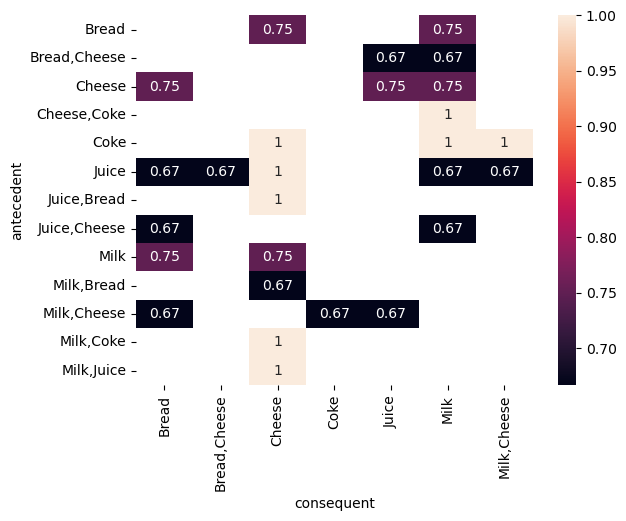

In [25]:
sns.heatmap(matrix,annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [28]:
def predict(items,rules,max_result = 6 ): 
    preds = rules[ rules['antecedents']== items] 
    preds = preds[['antecedents','consequents','confidence']]
    # print(preds)
    preds.sort_values('confidence',ascending=False)
    return preds[:max_result]


p = predict({'Milk',"Cheese"},rules,5)
print(p)

       antecedents consequents  confidence
19  (Milk, Cheese)      (Coke)    0.666667
24  (Milk, Cheese)     (Juice)    0.666667
17  (Milk, Cheese)     (Bread)    0.666667
